In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
df =pd.read_csv('C:\\Users\\USER\\Desktop\\CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [11]:
cdf = df[['Engine Size(L)', 'Cylinders' , 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)'	]]
cdf.head(9)

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


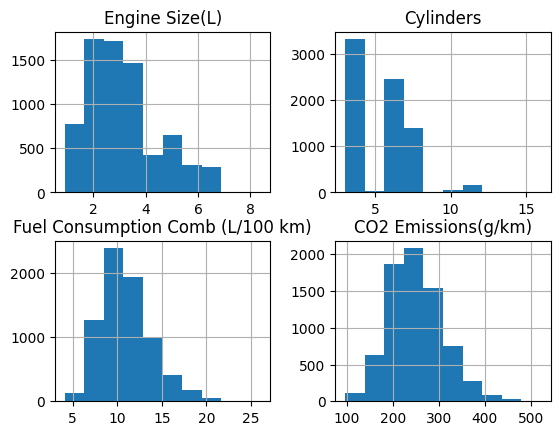

In [13]:
viz = cdf[['Engine Size(L)', 'Cylinders' , 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]
viz.hist()
plt.show()


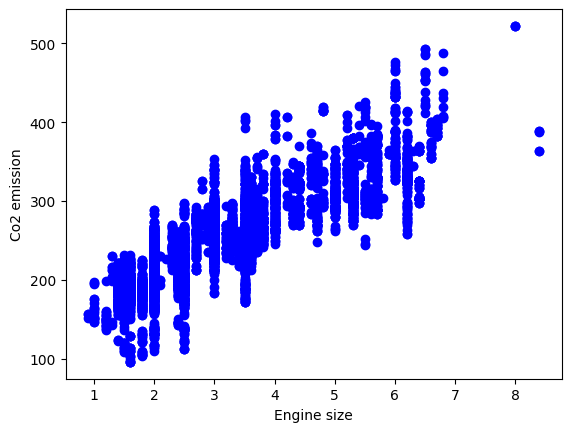

In [17]:
plt.scatter(cdf['Engine Size(L)'], cdf['CO2 Emissions(g/km)'], color='blue' )
# plt.scatter(cdf.Fuel Consumption Comb, cdf.CO2_Emissions, color='blue'  )
plt.xlabel("Engine size")
plt.ylabel("Co2 emission")
plt.show()

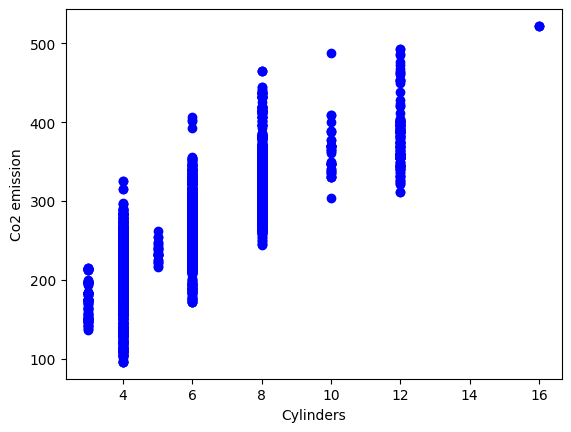

In [18]:
plt.scatter(cdf['Cylinders'], cdf['CO2 Emissions(g/km)'], color='blue' )
plt.xlabel("Cylinders")
plt.ylabel("Co2 emission")
plt.show()

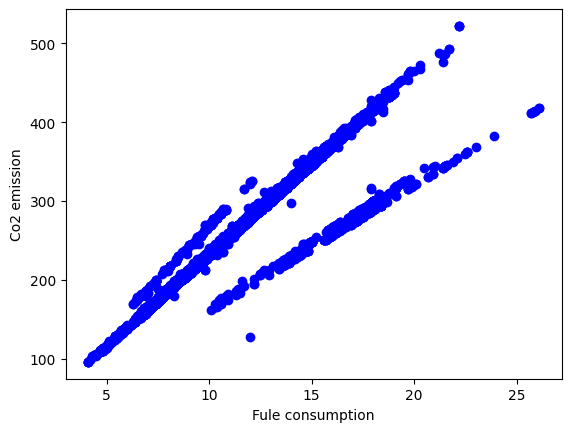

In [19]:
plt.scatter(cdf['Fuel Consumption Comb (L/100 km)'], cdf['CO2 Emissions(g/km)'], color='blue' )
plt.xlabel("Fule consumption")
plt.ylabel("Co2 emission")
plt.show()

In [20]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

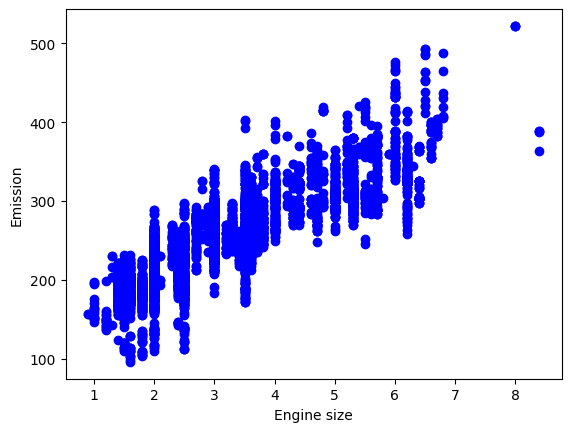

In [21]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'], color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine Size(L)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[36.66729221]]
Intercept:  [134.73962542]


Text(0, 0.5, 'co2 Emission')

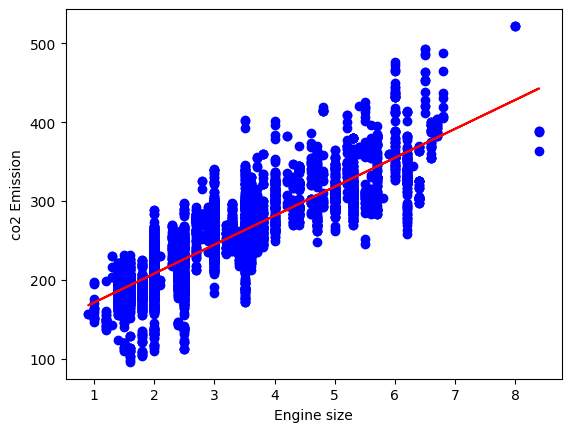

In [23]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("co2 Emission")

In [24]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine Size(L)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.38
Residual sum of squares (MSE): 977.71
R2-score: 0.71


In [25]:
train_x = train[["Fuel Consumption Comb (L/100 km)"]]

test_x = test[["Fuel Consumption Comb (L/100 km)"]]


In [26]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

In [27]:
predictions = regr.predict(test_x)

In [28]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 14.08
